In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [93]:
dataset = pd.read_csv('Social Network Ads.csv')
X=dataset.iloc[:, :-1].values
y=dataset.iloc[ :, -1].values

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# TRAINING K-NEAREST NEIGHBOUR MODEL

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# PREDICTING NEW RESULT

In [97]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# PREDICTING NEW TEST SET RESULT

In [98]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


# MAKING CONFUSION MATRIX

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

# VISUALISING TRAINING SET RESULT

In [100]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, sc (scaler), and classifier (e.g., KNN) are already defined
X_set, y_set = sc.inverse_transform(X_train), y_train

# Create the mesh grid for the plot
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1)
)

# Predict over the entire mesh grid (using the classifier)
X_grid = np.array([X1.ravel(), X2.ravel()]).T  # Shape (num_points, 2)
X_grid_scaled = sc.transform(X_grid)  # Scale the grid using the same scaler
predictions = classifier.predict(X_grid_scaled).reshape(X1.shape)  # Make predictions and reshape

# Define a valid colormap using a list of colors
colormap = ListedColormap(['salmon', 'dodgerblue'])

# Plot the contour plot
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=colormap)  # Use the colormap here
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training data points with the same colormap
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=colormap(i), label=j  # Use the colormap to color the points
    )

# Labels and title
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


KeyboardInterrupt: 

# VISUALISING TEST SET RESULT

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, sc (scaler), and classifier (e.g., KNN) are already defined
X_set, y_set = sc.inverse_transform(X_test), y_test

# Create the mesh grid for the plot
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1)
)

# Predict over the entire mesh grid (using the classifier)
X_grid = np.array([X1.ravel(), X2.ravel()]).T  # Shape (num_points, 2)
X_grid_scaled = sc.transform(X_grid)  # Scale the grid using the same scaler
predictions = classifier.predict(X_grid_scaled).reshape(X1.shape)  # Make predictions and reshape

# Define a valid colormap using RGB tuples for better compatibility
colormap = ListedColormap(['#fa8072', '#1e90ff'])  # RGB hex values for 'salmon' and 'dodgerblue'

# Plot the contour plot with alpha transparency and the colormap
plt.contourf(X1, X2, predictions, alpha=0.75, cmap=colormap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training data points with the same colormap
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=colormap(i), label=j  # Use the colormap to color the points
    )

# Labels and title
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


KeyboardInterrupt: 

ValueError: 'salmon' is not a valid color value.

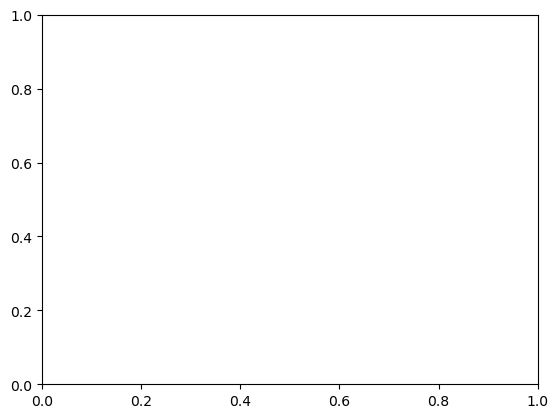

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['salmon', 'dodgerblue'])(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()